1.（1）
The linear regression equation represents the relationship between the predictor (independent) variable
X and the outcome Y(dependent) variable.
In a linear regression model, the predictor (independent) variable (𝑋) is used to predict the value of the outcome (dependent) variable (𝑌), with 𝑋 being the input and 𝑌 the outcome we aim to predict. The slope coefficient (𝛽₁) represents the rate of change in 𝑌 for each unit increase in 𝑋, showing the steepness of the regression line. The intercept coefficient (𝛽₀) indicates the value of 𝑌 when 𝑋 is 0, representing the starting point of the line. The error term (𝜖) accounts for the unexplained variation in 𝑌, capturing random noise or factors not represented by 𝑋 that affect the outcome.

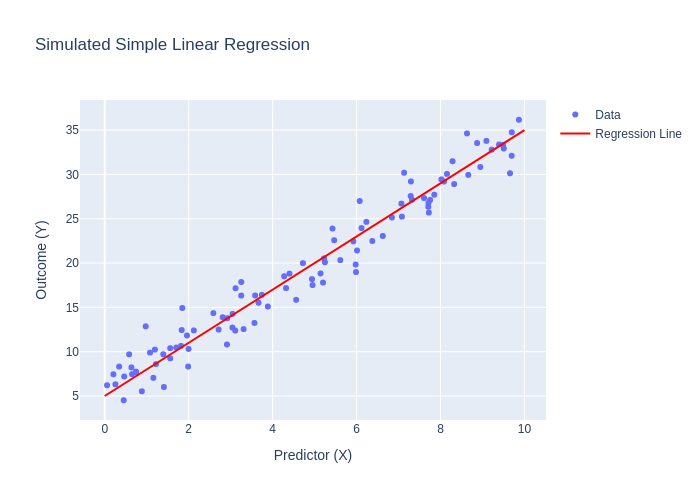

In [1]:
#（2）
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.graph_objects as go

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n = 100 
beta0 = 5
beta1 = 3 
sigma = 2 

X = np.random.uniform(0, 10, size=n)

epsilon = np.random.normal(0, sigma, size=n)

Y = beta0 + beta1 * X + epsilon

fig = go.Figure()

fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', name='Data'))

X_line = np.linspace(0, 10, 100)
Y_line = beta0 + beta1 * X_line
fig.add_trace(go.Scatter(x=X_line, y=Y_line, mode='lines', name='Regression Line', line=dict(color='red')))

fig.update_layout(title='Simulated Simple Linear Regression',
                  xaxis_title='Predictor (X)',
                  yaxis_title='Outcome (Y)',
                  showlegend=True)

fig.show(renderer="png")


Summery of chatbot:
In our conversation, we discussed the theoretical framework of Simple Linear Regression (SLR), a statistical method used to model the relationship between a predictor (independent) variable \( X \) and an outcome (dependent) variable \( Y \). The linear regression equation is expressed as \( Y = \beta_0 + \beta_1 X + \epsilon \), where \( \beta_0 \) is the intercept, \( \beta_1 \) is the slope, and \( \epsilon \) is the error term, which accounts for randomness or unobserved factors affecting \( Y \). The equation assumes that the error terms \( \epsilon \) are normally distributed with a mean of 0 and constant variance. This allows the observed values of \( Y \) to be viewed as samples from a normal distribution, with the regression line representing the predicted values of \( Y \) for each \( X \), and the error term capturing the deviations from the line.

link：https://chatgpt.com/share/672d76f1-1640-8005-b212-133d78e01db9

2.

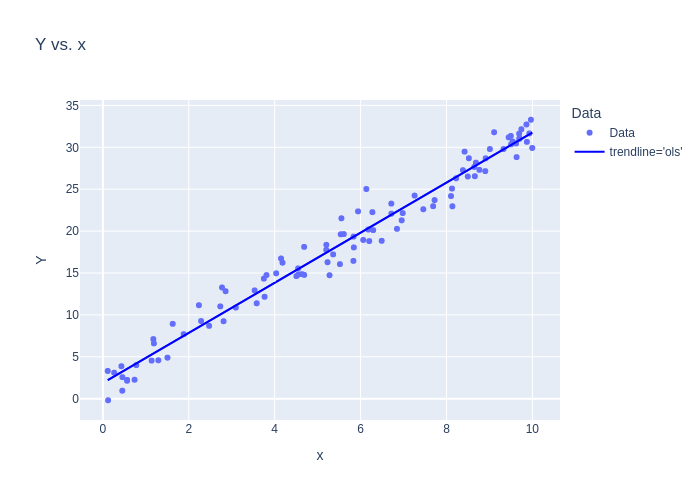

In [5]:
import pandas as pd
import plotly.graph_objects as go
from scipy.stats import norm, uniform
import statsmodels.formula.api as smf  
import plotly.express as px

n = 100
beta0 = 2  
beta1 = 3  
sigma = 1.5  

x = uniform.rvs(0, 10, size=n)
errors = norm.rvs(0, sigma, size=n)
y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'Y': y})

model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

# what do each of the following provide?
fitted_model.summary()  # simple explanation? 
fitted_model.summary().tables[1]  # simple explanation?
fitted_model.params  # simple explanation?
fitted_model.params.values  # simple explanation?
fitted_model.rsquared  # simple explanation?

# what two things does this add onto the figure?
df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png")

3.

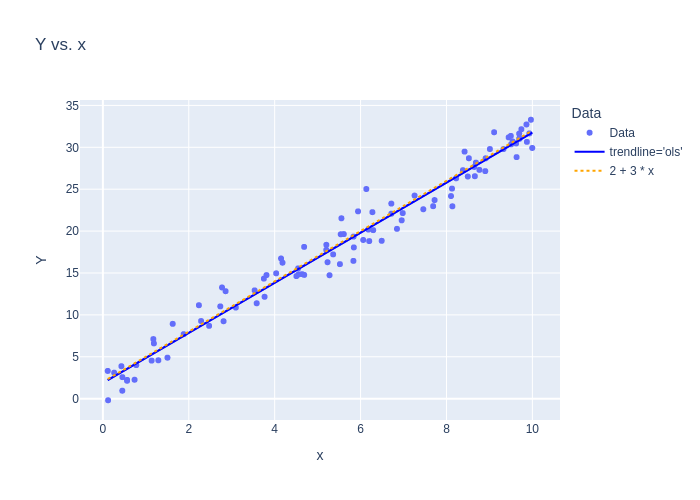

In [6]:
# what does this add onto the figure in constrast to `trendline='ols'`?
x_range = np.array([df['x'].min(), df['x'].max()])
# beta0 and beta1 are assumed to be defined
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))
fig.show(renderer="png")

In the first and second questions, the data lines generated by the code are drawn from real data and represent the real relationship between x and y. And the second line is generated through the simulation of the value of β, and there is an error with the real data

summery of chatbot:
In our chat, we discussed the difference between two lines on a plot: one generated using an OLS (Ordinary Least Squares) regression (`trendline='ols'`) and the other defined manually using a formula (`y_line = beta0 + beta1 * x_range`).

- The **OLS trendline** is fitted based on the data, representing the best linear fit with coefficients that minimize the error between the data points and the line.
- The **manually defined line** is drawn using fixed values for `beta0` (intercept) and `beta1` (slope), which may not match the best fit for the data.

The key difference is that the OLS trendline adapts to the data, while the manually defined line is static.

link: https://chatgpt.com/share/672d7c1f-f2e0-8005-8686-37cb4a02490d

4.

This table contains the parameters to be used for various linear regression equations, including the intercept and slope of the regression equation. With this data, we can build the regression equation and then bring in the values of x that we already know to find the value of y that we want.

summary of chat:
In our conversation, you asked about the code snippet `fitted_model.summary().tables[1]`. I explained that it is commonly used in statistical modeling, particularly with **statsmodels** in Python. The code retrieves the second table from the summary of a fitted model, which typically contains regression diagnostics or other model statistics. I also provided an example to illustrate how the code works.

link：https://chatgpt.com/share/672d7d4d-0580-8005-9a2d-602f7a61f78f

5.

Error is the discrepancy that results from subtracting the simulated value from the actual value of the data. By adding up the squares of the mistakes and comparing them, the minimal residual sum of squares is determined. The best suited β is then obtained. The best-fitting model is determined by β. Squaring is primarily used because it reduces the impact of both positive and negative data values and magnifies the effect of mistake, making it easier to distinguish between various error values.

summary of chat：
In our chat, we discussed the concept of least squares, which is a method used to fit a model to data by minimizing the sum of the squared errors (residuals) between observed and predicted values. The technique is widely used in regression analysis.

link：https://chatgpt.com/share/672d7f67-0574-8005-832a-81523fca2611

6.

 1-((Y-fitted_model.fittedvalues)2).sum()/((Y-Y.mean())2).sum()
 The R-square formula is represented by this string of code, where the total sum of squares is the denominator and the residual sum of squares, or the mistake that the model is unable to explain, is the numerator. The computation's outcome is the model's explanatory power, or the percentage of the total data that it can account for.   

fitted_model.rsquared
This code generates R-squared directly from the data, and as I explained in the previous question, R-squared is the value used to measure the model's explanatory power.

np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2 and np.corrcoef(Y,x)[0,1]**2

The two expressions both calculate the squared correlation coefficient, but in different contexts. The first expression, `np.corrcoef(Y, fitted_model.fittedvalues)[0, 1]**2`, measures the strength of the linear relationship between the actual observed values (`Y`) and the predicted values from a regression model, essentially reflecting the model's performance and its R² value. The second expression, `np.corrcoef(Y, x)[0, 1]**2`, measures the relationship between the dependent variable (`Y`) and an independent variable (`x`), showing how strongly `x` is related to `Y`. While both represent squared correlation coefficients, the first is related to model fit, and the second reflects the influence of a single independent variable on the dependent variable.

summary of chatbot：
In our conversation, we discussed two concepts related to regression analysis:

1. **R-squared (R²)**: R² is a measure of how well a regression model explains the variance in the dependent variable. It is calculated as 1 minus the ratio of the residual sum of squares (RSS) to the total sum of squares (TSS), representing the proportion of variance explained by the model.

2. **Differences between two correlation calculations**:
   - **`np.corrcoef(Y, fitted_model.fittedvalues)[0, 1]**2`**: This calculates the squared correlation coefficient between the **actual values (Y)** and the **predicted values** from the regression model, which is essentially a measure of **model fit** (similar to R²).
   - **`np.corrcoef(Y, x)[0, 1]**2`**: This calculates the squared correlation coefficient between **actual values (Y)** and an **independent variable (x)**, showing how strongly the independent variable is related to the dependent variable, but not how well the model explains the variance.

The main distinction is that the first expression is related to evaluating model performance, while the second is about the relationship between a single predictor and the outcome variable.

link：https://chatgpt.com/share/672d8231-e3e0-8005-8940-82db804b6387

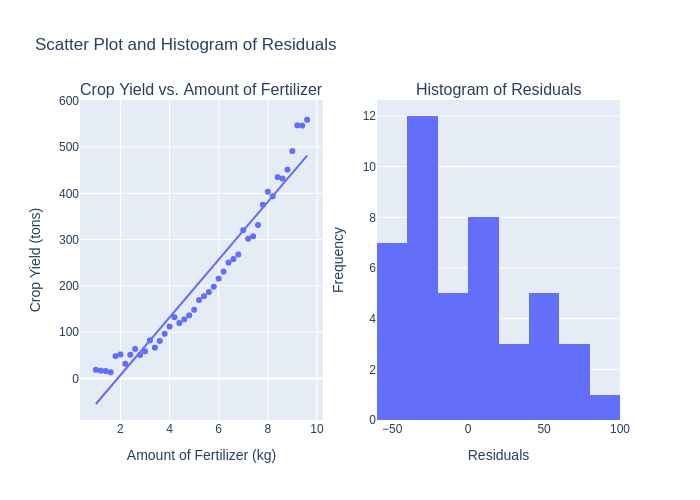

In [3]:
#7
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The second graphic indicates a right skew in the ERROR value distribution. It demonstrates that a normal distribution is not followed. Additionally, data values near 100 are less common, suggesting that the degree of dispersion varies among values in different ranges. Therefore, I believe it to be a violation of the Constant Variance and Normality Assumptions.

#8

In [9]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        03:15:51   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the P-value given in the table, it is smaller than 0.001, we have very strong evidence against the null hypothesis. Therefore, we obtain the alternative hypothesis which indicates that the parameter of simple linear regression has linear association.

#9

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


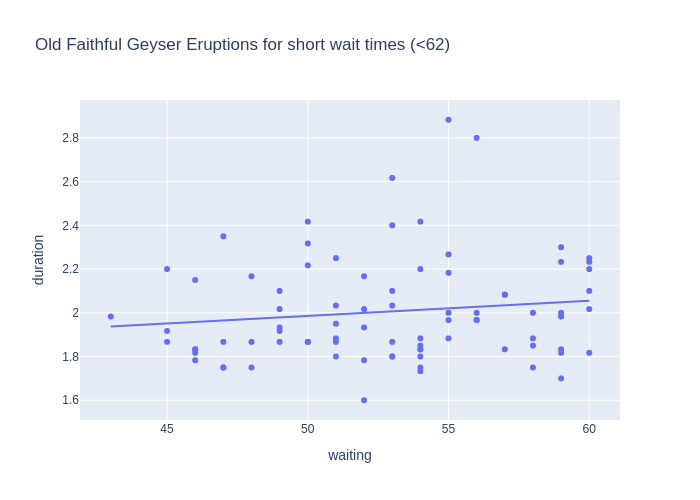

In [10]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

According to the P-value given in the table, it is bigger than 0.1, we have no evidence against the null hypothesis. Therefore, we obtain the null hypothesis which indicates that the parameter of simple linear regression has no linear association.

#10

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


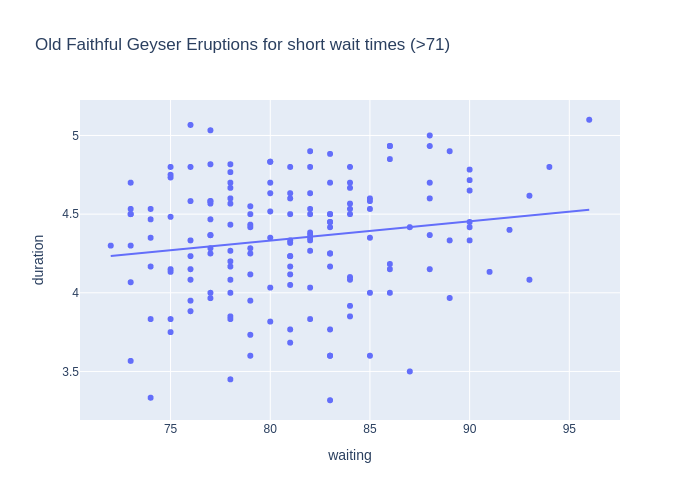

In [11]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [13]:
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd
import plotly.express as px
from scipy import stats

import seaborn as sns
old_faithful = sns.load_dataset('geyser')

long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit
subset_long_wait = old_faithful[long_wait]

num_bootstrap_samples = 1000
bootstrapped_slope_coefficients = []

for _ in range(num_bootstrap_samples):
    sample = subset_long_wait.sample(n=len(subset_long_wait), replace=True)
    model = smf.ols('duration ~ waiting', data=sample).fit()
    bootstrapped_slope_coefficients.append(model.params['waiting'])

fig_bootstrap = px.histogram(
    bootstrapped_slope_coefficients,
    nbins=30,
    title="Bootstrapped Sampling Distribution of Slope Coefficients",
    labels={'value': 'Slope Coefficient'},
    marginal="box"
)
fig_bootstrap.show()

old_faithful_simulation = subset_long_wait.copy()
num_simulations = 1000
simulated_slope_coefficients = []

for _ in range(num_simulations):
    old_faithful_simulation['duration'] = (
        1.65 + 0 * old_faithful_simulation['waiting'] +
        stats.norm(loc=0, scale=0.37).rvs(size=len(old_faithful_simulation))
    )
    model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(model.params['waiting'])

fig_simulation = px.histogram(
    simulated_slope_coefficients,
    nbins=30,
    title="Simulated Sampling Distribution of Slope Coefficients (Null Hypothesis)",
    labels={'value': 'Slope Coefficient'},
    marginal="box"
)
fig_simulation.show()

conf_interval = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
print(f"95% Bootstrapped Confidence Interval: {conf_interval}")

fitted_model = smf.ols('duration ~ waiting', data=subset_long_wait).fit()
original_slope = fitted_model.params['waiting']
is_contained = conf_interval[0] <= original_slope <= conf_interval[1]
print(f"Is the original slope within the 95% confidence interval? {is_contained}")

p_value = (np.abs(simulated_slope_coefficients) >= np.abs(original_slope)).mean()
print(f"Simulated p-value: {p_value}")

print(fitted_model.summary().tables[1])

95% Bootstrapped Confidence Interval: [0.00056298 0.02313283]
Is the original slope within the 95% confidence interval? True
Simulated p-value: 0.028
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


The confidence interval for the null hypothesis is set to include 0, while for the alternative hypothesis, it is set to exclude 0. Based on the calculations, since the confidence interval does not contain 0, we have sufficient evidence to reject the null hypothesis. This conclusion aligns with the results obtained from hypothesis testing using the p-value.

11.

Question 11 presents time as a binary variable—long and short—in contrast to the preceding method. Two time periods are represented by these two variables. The null hypothesis, which holds that there is no difference between the two sets of data, and the alternative hypothesis, which holds that there is, are employed. The original model's code looks at how the duration changes with each extra unit of waiting time. In contrast, the new model separates the data into two groups and uses the average of the two groups to make inferences. The code run's results indicate that the p-value is less than 0.001. This indicates that we have sufficient proof to disprove the null hypothesis that there. And there is a significant difference between the data in the long and short duration groups.

12.

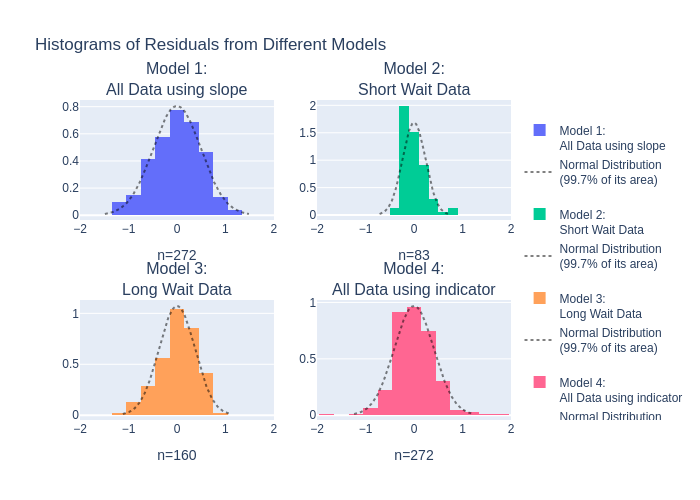

In [15]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1: 
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png")

The code runs and you can see four breakthroughs, the first image is a standard normally distributed image, so the normality assumption is satisfied. The second image is a right skewed image and does not meet it. The third image is a left-skewed image and does not meet it. The last image is symmetrical, but it has too many extremes distributed on the left and right sides with too wide a range, so it also does not meet it.

13.

In [16]:
#（A）
import numpy as np
import pandas as pd

if 'waiting' in old_faithful.columns:
    old_faithful['indicator_variable'] = (old_faithful['waiting'] >= 68).astype(int)
else:
    print("Column 'waiting' not found in the dataset.")

group_1 = old_faithful[old_faithful['indicator_variable'] == 0]['waiting']  # short wait times
group_2 = old_faithful[old_faithful['indicator_variable'] == 1]['waiting']  # long wait times

observed_diff = group_2.mean() - group_1.mean()
print(f"Observed difference in means: {observed_diff:.4f}")

combined_data = np.concatenate([group_1.values, group_2.values])

num_permutations = 10000
permuted_diffs = []

for _ in range(num_permutations):
    np.random.shuffle(combined_data)
    
    new_group_1 = combined_data[:len(group_1)]
    new_group_2 = combined_data[len(group_1):]
    
    perm_diff = new_group_2.mean() - new_group_1.mean()
    permuted_diffs.append(perm_diff)

permuted_diffs = np.array(permuted_diffs)
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

print(f"P-value from the permutation test: {p_value:.4f}")


Observed difference in means: 25.5349
P-value from the permutation test: 0.0000


The null hypothesis (H₀) states that the average eruption time for "short" and "long" wait durations is the same. Hypothesis Alternative (H₁): Mean eruption durations for "short" and "long" wait times differ from one another. The null hypothesis that there is a significant difference between the means of the "long" and "short" groups may be rejected since the p-value is less than 0.001.

In [17]:
#（B）
import numpy as np
import pandas as pd

if 'waiting' in old_faithful.columns:
    old_faithful['indicator_variable'] = (old_faithful['waiting'] >= 68).astype(int)
else:
    print("Column 'waiting' not found in the dataset.")

group_1 = old_faithful[old_faithful['indicator_variable'] == 0]['waiting']
group_2 = old_faithful[old_faithful['indicator_variable'] == 1]['waiting']

num_bootstraps = 10000
bootstrapped_mean_differences = []

for _ in range(num_bootstraps):
    bootstrap_sample_1 = np.random.choice(group_1, size=len(group_1), replace=True)
    bootstrap_sample_2 = np.random.choice(group_2, size=len(group_2), replace=True)

    mean_1 = bootstrap_sample_1.mean()
    mean_2 = bootstrap_sample_2.mean()
    
    mean_diff = mean_2 - mean_1
    bootstrapped_mean_differences.append(mean_diff)

bootstrapped_mean_differences = np.array(bootstrapped_mean_differences)

lower_bound, upper_bound = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])

print(f"95% Bootstrap Confidence Interval for the difference in means: ({lower_bound:.4f}, {upper_bound:.4f})")

95% Bootstrap Confidence Interval for the difference in means: (24.0974, 26.9151)


（a）The bootstrap method and permutation test are both resampling techniques used to assess statistical significance and uncertainty in the context of comparing two groups (e.g., "short" and "long" wait times). In the permutation test, the null hypothesis assumes no difference between the two groups. To test this, you combine the data from both groups, shuffle it randomly, and reassign the shuffled values into two new groups of the same size, calculating the difference in means each time. By repeating this process many times (e.g., 10,000 permutations), you generate a distribution of differences under the null hypothesis, and compare the observed difference to this distribution to determine statistical significance. The bootstrap method, on the other hand, is used to estimate the confidence interval for the difference in means. It involves resampling with replacement from the observed data to create "bootstrap samples," calculating the mean difference for each sample, and repeating the process many times (e.g., 10,000 samples). The resulting distribution of mean differences allows you to calculate percentiles (e.g., 2.5th and 97.5th percentiles) to estimate a confidence interval. If this interval does not include zero, it suggests a statistically significant difference between the groups. Both methods do not rely on specific distributional assumptions and provide a non-parametric approach to inference, with the permutation test assessing the likelihood of an observed difference under the null hypothesis, and the bootstrap method quantifying the uncertainty around the difference.

（b）
Indicator variable models use a binary variable by categorizing observations into two groups - short wait times and long wait times. This variable is then used in a regression model to estimate the difference in eruption duration between the two groups. This approach tests for significant differences in means between the two groups by examining the coefficients of the indicator variables. In contrast, the subset-based simple linear regression approach fits separate linear models on two subsets (short and long waits) to estimate the relationship between wait time and eruption duration in each group. This approach does not directly test for differences between groups, but rather analyzes the relationship in each group separately. Indicator variable models are simpler and more straightforward when comparing group means, whereas the subset-based regression approach provides more flexibility to analyze each group separately and does not depend on specific model assumptions.

summary of chat：
We discussed three methods for analyzing the relationship between wait times and eruption durations. The **indicator variable model** uses a binary variable to compare "short" and "long" wait times in a single regression, testing if the means differ. The **simple linear regression on subsets** models each group separately, estimating different relationships for each. Finally, we compared both to **permutation tests** and **bootstrap methods**, which are non-parametric and assess significance or uncertainty without specific model assumptions. The indicator model directly compares group means, while the other methods offer more flexibility.

link：
https://chatgpt.com/share/672d8a96-db80-8005-b81f-b00ca170b6a8

14
yes